In [0]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras.datasets import mnist

In [0]:
(X_train, Y_train ), (X_test, Y_test) = mnist.load_data()

In [97]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

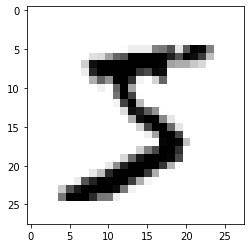

5


In [98]:
plt.imshow(X_train[0], cmap = plt.cm.binary)
plt.show()
print(Y_train[0])

In [99]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [0]:
#change the type of value into float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [0]:
#Expanding the dimenions
X_train= np.expand_dims(X_train, axis=-1)  # (60000, 28, 28, 1)
X_test = np.expand_dims(X_test, axis=-1) # (10000, 28, 28, 1)

Y_train = keras.utils.to_categorical(Y_train)
Y_test = keras.utils.to_categorical(Y_test)

# normalize the value
X_train = (X_train/255)
X_test = (X_test/255)

In [102]:
print(X_train.shape)
X_train[0].shape

(60000, 28, 28, 1)


(28, 28, 1)

In [0]:
#importing kera model and layers
from keras import Sequential
Classifier = Sequential()
from keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout

In [0]:
#Defining the model
Classifier.add(Conv2D(32, kernel_size=(3,3), input_shape = (28,28,1), activation='relu'))

In [0]:
Classifier.add(MaxPooling2D(pool_size= (2,2)))
Classifier.add(Dropout(0.25))
Classifier.add(Flatten())

In [0]:
Classifier.add(Dense(units=128 ,activation='relu'))
Classifier.add(Dropout(0.5))
Classifier.add(Dense(units=10, activation='softmax'))

In [0]:
#Compiling the model
Classifier.compile(optimizer ='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [108]:
#train the model
Classifier.fit(X_train, Y_train,
               #steps_per_epoch = 2000,
               epochs = 5
          )

Epoch 1/5
60000/60000 [==============================] - 13s 209us/step - loss: 0.2728 - accuracy: 0.9190
Epoch 2/5
60000/60000 [==============================] - 12s 205us/step - loss: 0.1212 - accuracy: 0.9640
Epoch 3/5
60000/60000 [==============================] - 12s 207us/step - loss: 0.0914 - accuracy: 0.9729
Epoch 4/5
60000/60000 [==============================] - 12s 206us/step - loss: 0.0762 - accuracy: 0.9765
Epoch 5/5
60000/60000 [==============================] - 12s 206us/step - loss: 0.0662 - accuracy: 0.9790


In [0]:
#make prediction
Prediction = Classifier.predict(X_test)

In [112]:
print(Prediction[3])
#printing 1st prediction
print(np.argmax(Prediction[0]))
#using argma function for getting inde of highest value
print(np.argmax(Prediction, axis=1))

[9.9987054e-01 1.4725251e-07 8.6682176e-06 1.4684385e-07 3.8294695e-07
 3.1383131e-06 1.0600624e-04 2.2051515e-06 4.6293717e-06 4.1808089e-06]
7
[7 2 1 ... 4 5 6]


In [111]:
#Evaluating the model
Score = Classifier.evaluate(X_test, Y_test, verbose=0)
print(Score)

[0.036929981893417424, 0.9879999756813049]
